# Lab work # 1

> Student name    - Daria

> Student surname - Uzenkova

> Group           - CS-31

> Variant         - 11


# Task description

### Overall work description

The work will contain 2 main parts:
1. In the first part you'll build intuition behind using various regression models using only artificially generated (with noise & outliers) data. I've generated 2 options with `f(x) = A*sin(x) + B` and `f(x) = a*x + b` functions. (you free to add more complex functions (even more dimensional).
2. In the second part you'll solve regression problem on the real data.

Do NOT forget to change your `STUDENT_NO` -- this variable defines random state (it just makes experimental data for every one slighty different).

Do NOT forget to set you contact data in the top cell.


### I. Experiments on artificially generated data:

1. Manually tune linear model by changing `a` and `b` weights of it. Observe position of the line and values of loss function.
2. **More advanced task** (+2 point): modify my code to work with more complex functions as regression models (linear, polynomial, sin, cos, and their combination). Feel free to use as complex function as you could found. Generate some random non-linear data and use your function to manually adjust its weights.
3. Play with default regression methods from `sklearn` library on non-linear data. Search, llm-prompt information on each model to understand how to make the model fit the data without overfitting.


### II. Experiments on real data. (you can keep it in this notebook or in a separate one).

1. Choose any DataSet you like for you experiments (if you've chosen the same, consider that work must differ, otherwise both students will get 0 points for work).
2. Choose the top-3 methods (from `sklearn` library, or you can use other libraries (like `xgboost`) from the previous part.
2. Solve the regression problem in the same manner, as you used for.
    1. Load the data
    2. Do data visualization: correlation, feature distribution, etc.
    3. Do data analysis
    4. Do data correction
    5. Prepare data on usage with ML model: train, validation if necessary, test split; data convertion (to fix distribution or change data type to numeric); remove outliers.
    6. Tune hyperparameters of your model to get the best one.
    7. Train & test the final version of the model. Do conclusion.
3. Your main goal is tune hyperparameters of the chosen models.
4. Examples and template you can find in `ML_basic_course/lab_works/lab2/lab_2_example_plus_task.ipynb`. Or in [my GitHub repo's folder](https://github.com/VolDonets/ML_basics_course/tree/master/lab_works/lab_2)
5. Use that notebook as template, but remember your main goal is to tune hyperparameters of chosen models.

### III. Important.

1. Students, who solved the problem in a single code cell will get 0 points for your work. It's hard to work with your messy code, we have limited time. Use this notebook as your template, create as many cells as you need. Also you can conduct experiments in .py files but in that case prepare normal report.
2. Experiments means you have multiple cells with EXPERIMENTS and your CONCLUSION after that.
3. You can have multiple notebooks if you need, but name it correctly and add `ReadMe.md`.


## Proposition of the real data for experiments

0. Your own data (the main idea here that target value is a number, not a class)
1. [Taxi Price Regression 🚕](https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction)
2. [Car Pricing Regression Dataset](https://www.kaggle.com/datasets/amjadzhour/car-price-prediction)
3. [Second Hand Car Price Prediction
](https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction)
4. [Indian Rental House Price](https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price)
5. *** [Google Stock Prediction](https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction) -- this is stock data, so probably for prediction you'll need the previous values (for previous days, or day).
6. [Forest Fire Regression](https://www.kaggle.com/datasets/nimapourmoradi/forest-fire-regression)
7. [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price)
8. *** [Asteroid Dataset](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset) -- this is hard problem, try to predict any continuous feature (like asteroid radius).
9. [Salary Prediction](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor)
10. [January Flight Delay Prediction](https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction)
11. [Restaurants Revenue Prediction](https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction)
12. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)
13. [Furniture Price Prediction](https://www.kaggle.com/datasets/shawkyelgendy/furniture-price-prediction) 

In [1196]:
STUDENT_NO = 21

# Import dependencies

In [1197]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


# Helping functions

In [1198]:
def generate_regression_data(
    n_samples=50, 
    n_features=1, 
    mode='linear', 
    noise=2.0, 
    n_outliers=5, 
    random_seed=42, 
    return_coef=False
):
    """
    Generates data for regression tasks, compatible with scikit-learn.

    :param n_samples: The total number of data points to generate.
    :param n_features: The number of features for the dataset.
    :param mode: The underlying pattern of the data. Can be 'linear' or 'nonlinear'.
    :param noise: The standard deviation of Gaussian noise added to the y-values.
    :param n_outliers: The number of outlier points to add to the dataset.
    :param random_seed: A seed for the random number generator for reproducibility.
    :param return_coef: If True, also returns the true coefficients of the generative model.
    :returns: A tuple (X, y) or (X, y, coefficients) if return_coef is True.
              X is the feature matrix of shape (n_samples, n_features).
              y is the target vector of shape (n_samples,).
              coefficients is a dictionary with 'weights' and 'intercept'.
    """
    
    np.random.seed(random_seed)

    X = np.random.rand(n_samples, n_features) * 10 - 5

    true_intercept = 0
    true_weights = np.zeros(n_features)
    
    if mode == 'linear':
        true_intercept = np.random.uniform(-3, 3)
        true_weights = np.random.uniform(-5, 5, size=n_features)
        y_true = np.dot(X, true_weights) + true_intercept
    elif mode == 'nonlinear':
        if n_features < 1:
            raise ValueError("Nonlinear mode requires at least 1 feature.")
        
        true_intercept = np.random.uniform(-15, 15)
        true_weights = np.random.uniform(-5, 5, size=n_features)
        
        y_true = true_weights[0] * 20 * np.sin(X[:, 0]*1.5) + true_intercept
        
        if n_features > 1:
             y_true += np.dot(X[:, 1:], true_weights[1:])
    else:
        raise ValueError("Mode must be either 'linear' or 'nonlinear'")

    y = y_true + np.random.normal(scale=noise, size=n_samples)

    if n_outliers > 0:
        outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
        outlier_offset = (np.random.rand(n_outliers) - 0.5) * 30 * (noise + 1)
        y[outlier_indices] += outlier_offset

    if return_coef:
        coefficients = {'weights': true_weights, 'intercept': true_intercept}
        return X, y, coefficients
    else:
        return X, y

In [1199]:
def plot_regression_model(
    X, 
    y, 
    weights=None,
    intercept=None, 
    title="Regression Model Visualization",
):
    """
    Visualizes regression data and model performance.

    If the data has one feature, it plots the data points and the regression line.
    If the data has multiple features, it plots the model's predicted vs. actual values.

    :param X: The feature matrix, shape (n_samples, n_features).
    :param y: The target vector, shape (n_samples,).
    :param weights: The model's feature weights (coefficients).
    :param intercept: The model's intercept.
    :param title: The title for the plot.
    :returns: None. Displays a matplotlib plot.
    """
    
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n_features = X.shape[1]
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))

    model_provided = weights is not None and intercept is not None

    if n_features == 1:
        ax.scatter(X, y, c='cornflowerblue', alpha=0.7, edgecolors='k', label='Data Points')
        
        if model_provided:
            x_line = np.linspace(X.min(), X.max(), 200)
            y_line = x_line * weights[0] + intercept
            label = f'Model: y = {weights[0]:.2f}x + {intercept:.2f}'
            ax.plot(x_line, y_line, color='crimson', linewidth=2.5, label=label)

        ax.set_xlabel("Feature (X)", fontsize=12)
        ax.set_ylabel("Target (y)", fontsize=12)

    else: # n_features > 1
        if not model_provided:
            print("Cannot visualize raw multi-feature data. Please provide model weights and intercept to generate a plot.")
            plt.close(fig)
            return

        y_pred = np.dot(X, weights) + intercept
        
        ax.scatter(y, y_pred, c='cornflowerblue', alpha=0.7, edgecolors='k')
        
        perfect_fit_line = np.linspace(min(y.min(), y_pred.min()), max(y.max(), y_pred.max()), 100)
        ax.plot(perfect_fit_line, perfect_fit_line, color='crimson', linestyle='--', linewidth=2.5, label='Perfect Fit (y_pred = y_true)')
        
        ax.set_xlabel("Actual Values (y_true)", fontsize=12)
        ax.set_ylabel("Predicted Values (y_pred)", fontsize=12)
        ax.legend(fontsize=11)

    ax.set_title(title, fontsize=14, weight='bold')
    plt.show()

In [1200]:
def plot_sklearn_regression(model, X, y, title="Model Performance", step=0.01):
    """
    Visualizes the performance of a trained scikit-learn regression model.

    If X has one feature, it plots the data and the model's line point-by-point.
    If X has multiple features, it plots the model's predicted vs. actual values.

    :param model: A trained scikit-learn regressor object (e.g., LinearRegression, Ridge).
    :param X: The feature matrix, shape (n_samples, n_features).
    :param y: The true target vector, shape (n_samples,).
    :param title: The title for the plot.
    :param step: The precision delta for drawing the model's line in the 1D case.
    :returns: None. Displays a matplotlib plot.
    """
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n_features = X.shape[1]
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))

    if n_features == 1:
        ax.scatter(X, y, c='cornflowerblue', alpha=0.6, edgecolors='k', label='Actual Data')
        
        # --- Updated Section ---
        x_min, x_max = X.min(), X.max()
        padding = (x_max - x_min) * 0.05
        
        # Create X-records point-by-point using the specified step/precision
        x_line = np.arange(x_min - padding, x_max + padding, step).reshape(-1, 1)
        
        # Get the corresponding y-values from the model
        y_line = model.predict(x_line)
        # --- End Updated Section ---
        
        ax.plot(x_line, y_line, color='crimson', linewidth=1.5, label='Model Prediction Line')
        ax.set_xlabel("Feature (X)", fontsize=12)
        ax.set_ylabel("Target (y)", fontsize=12)

    else: # Multi-feature case
        y_pred = model.predict(X)
        
        ax.scatter(y, y_pred, c='cornflowerblue', alpha=0.6, edgecolors='k')
        
        perfect_fit_line = np.linspace(min(y.min(), y_pred.min()), max(y.max(), y_pred.max()), 100)
        ax.plot(perfect_fit_line, perfect_fit_line, color='crimson', linestyle='--', linewidth=2, label='Perfect Fit')
        
        ax.set_xlabel("Actual Values", fontsize=12)
        ax.set_ylabel("Predicted Values", fontsize=12)

    ax.legend(fontsize=11)
    ax.set_title(title, fontsize=14, weight='bold')
    plt.show()

In [1201]:
def evaluate_regression_model(y_true, X, model, print_results=True, log_transform=False):
    """
    Calculates and optionally prints metrics for a given regression model.
    
    :param y_true: The actual target values.
    :param X: The feature matrix.
    :param model: A trained sklearn model, a np.poly1d object, or a list of coefficients.
    :param print_results: If True, prints the metrics to the console.
    :param log_transform: If True, applies np.expm1 to predictions (undo log1p transformation).
    :returns: A dictionary containing the calculated metrics.
    """
    y_pred = None
    
    if hasattr(model, 'predict'):
        y_pred = model.predict(X)
    elif isinstance(model, (list, np.ndarray, np.poly1d)):
        poly_model = np.poly1d(model)
        if X.ndim > 1 and X.shape[1] > 1:
            print("Warning: Manual weights are being applied to the first feature of X only.")
        y_pred = poly_model(X[:, 0] if X.ndim > 1 else X)
    else:
        raise TypeError("Model type not supported. Please provide a scikit-learn model or a list of weights.")
    
    if log_transform:
        y_pred = np.expm1(y_pred)  # возвращаемся к исходным единицам
    
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }
    
    if print_results:
        print("----- 📈 Model Evaluation -----")
        print(pd.Series(metrics).to_string(float_format="%.4f"))
        print("-----------------------------")
    
    return metrics


# Section 1: experiments on artificial data

**More advanced task** (+2 point): modify my code to work with more complex functions for regression (linear, polynomial, sin, cos, and their combination). Feel free to use as complex function as you could found.

## 1.1. Tuning manual Linear Regression 

Just change coefficients of the Linear model and observe changes in loss function

In [1202]:
# Generating data
X_lin, y_lin = generate_regression_data(
    n_samples=250, 
    n_features=1, 
    mode='linear', 
    noise=5.0, 
    n_outliers=7, 
    random_seed=STUDENT_NO, 
    return_coef=False
)


Testing a=2.5, b=5
----- 📈 Model Evaluation -----
MAE      38.4853
MSE    2319.6487
RMSE     48.1627
R2     -277.9460
-----------------------------


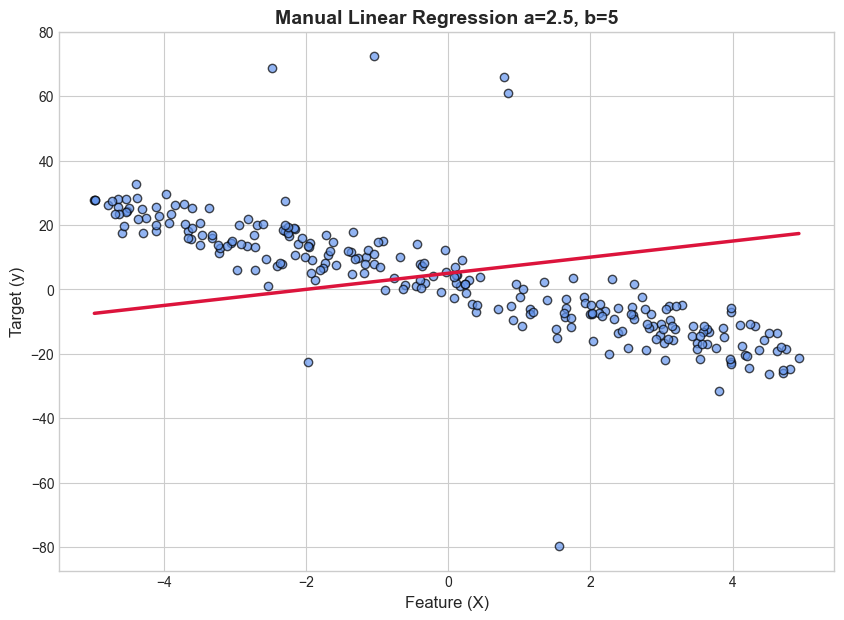


Testing a=3.0, b=4
----- 📈 Model Evaluation -----
MAE      45.3977
MSE    3230.8787
RMSE     56.8408
R2     -387.5246
-----------------------------


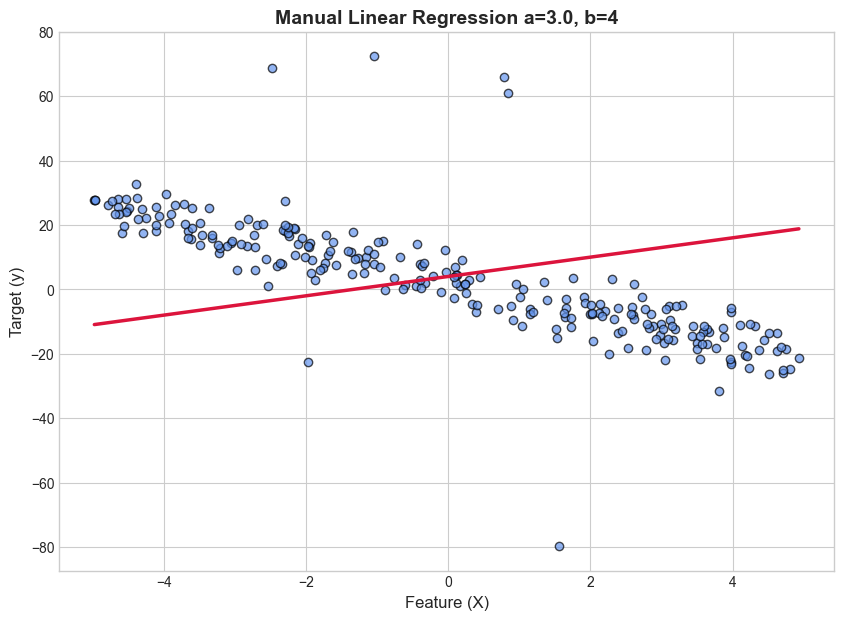


Testing a=2.0, b=6
----- 📈 Model Evaluation -----
MAE      31.5750
MSE    1564.7509
RMSE     39.5569
R2     -187.1668
-----------------------------


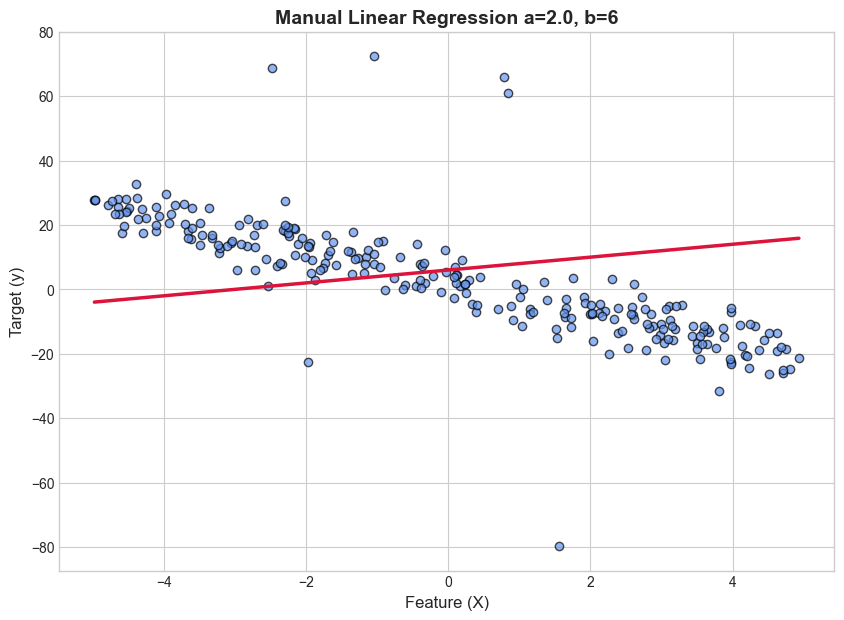

In [1203]:
for a, b in [(2.5, 5), (3.0, 4), (2.0, 6)]:
    lin_model_weights = [a, b]
    print(f"\nTesting a={a}, b={b}")
    evaluate_regression_model(X_lin, y_lin, model=lin_model_weights)
    plot_regression_model(X_lin, y_lin, weights=[a], intercept=b, title=f"Manual Linear Regression a={a}, b={b}")


## 1.2. Tuning Linear Regression on non-linear data

Just change coefficients of the Linear model and observe changes in loss function

In [1204]:
# Generating data
X_nonlin, y_nonlin = generate_regression_data(
    n_samples=300, 
    n_features=1, 
    mode='nonlinear', 
    noise=5.0, 
    n_outliers=10, 
    random_seed=STUDENT_NO, 
    return_coef=False
)


--- Experiment 1: a=-3, b=10 ---
----- 📈 Model Evaluation -----
MAE      62.3138
MSE    5419.2300
RMSE     73.6154
R2     -642.5410
-----------------------------


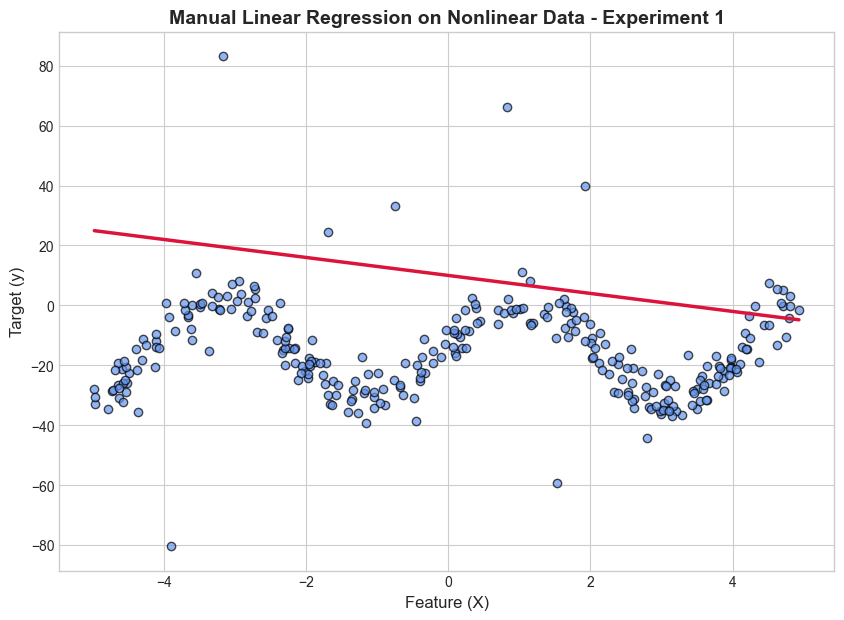


--- Experiment 2: a=-5, b=15 ---
----- 📈 Model Evaluation -----
MAE      102.4421
MSE    14762.4654
RMSE     121.5009
R2     -1752.0631
-----------------------------


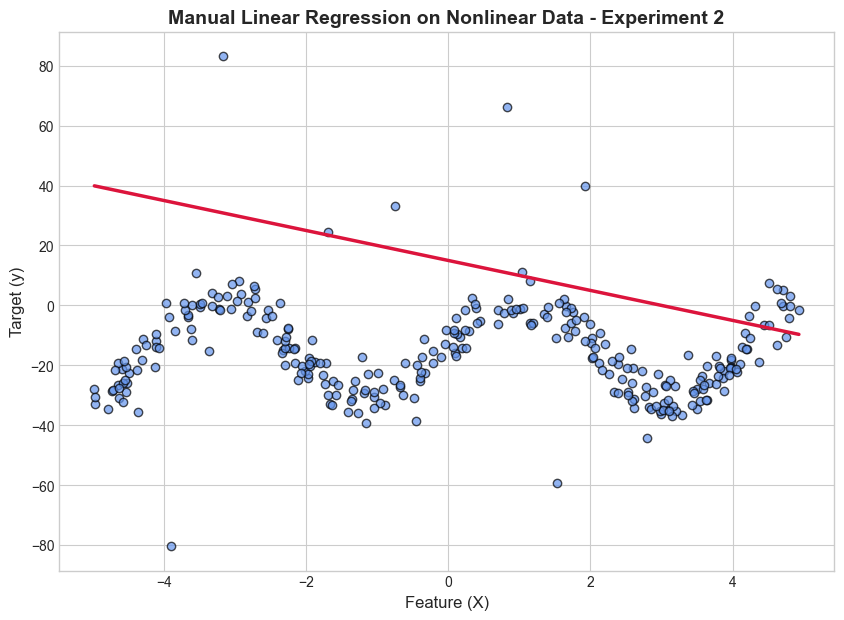


--- Experiment 3: a=0, b=5 ---
----- 📈 Model Evaluation -----
MAE     4.9061
MSE    32.4906
RMSE    5.7001
R2     -2.8583
-----------------------------


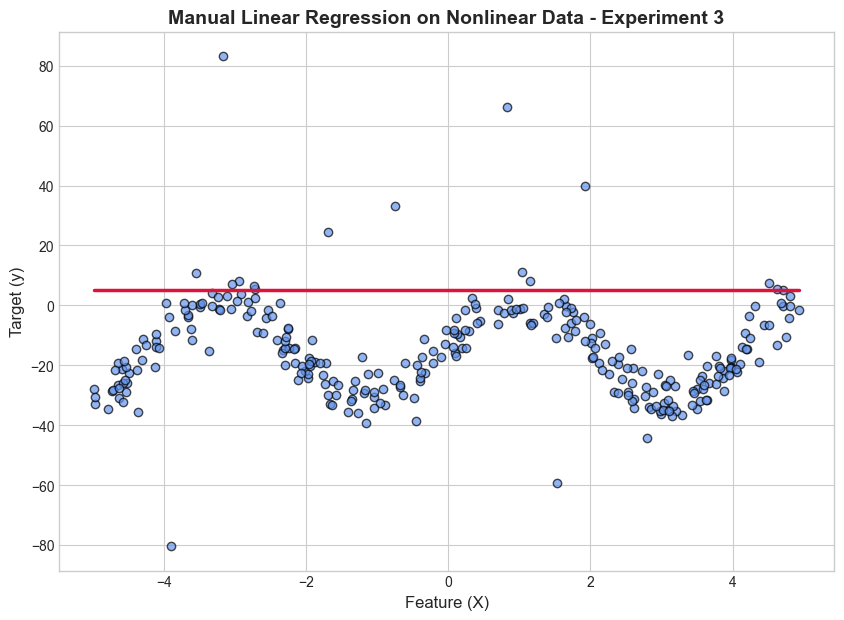

In [1205]:
lin_coeffs_list = [
    [-3, 10],
    [-5, 15],
    [0, 5],
]

for i, lin_model_weights in enumerate(lin_coeffs_list, 1):
    print(f"\n--- Experiment {i}: a={lin_model_weights[0]}, b={lin_model_weights[1]} ---")
    
    evaluate_regression_model(X_nonlin, y_nonlin, model=lin_model_weights, print_results=True)
    
    plot_regression_model(
        X_nonlin, 
        y_nonlin, 
        weights=[lin_model_weights[0]], 
        intercept=lin_model_weights[1],
        title=f'Manual Linear Regression on Nonlinear Data - Experiment {i}'
    )

## 1.3. Configuring various linear models from sklearn library

Try to configure hyperparameters of various linear regression models from sklearn

In [1206]:
from sklearn.linear_model import LinearRegression, HuberRegressor, PoissonRegressor

### 1.3.1. Playing with `HuberRegressor`

In [1207]:
hub_params_list = [
    {'epsilon': 1.0, 'alpha': 0.0001},   
    {'epsilon': 1.2, 'alpha': 0.001},   
    {'epsilon': 1.5, 'alpha': 0.01},    
]


--- Experiment 1: epsilon=1.0, alpha=0.0001 ---
----- 📈 Model Evaluation -----
MAE      5.2630
MSE    112.7454
RMSE    10.6182
R2       0.6381
-----------------------------


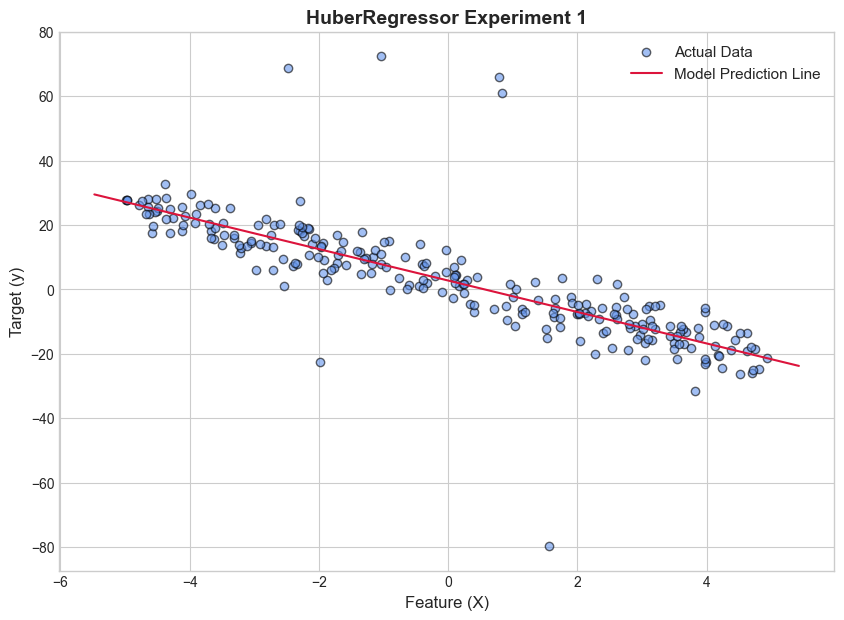


--- Experiment 2: epsilon=1.2, alpha=0.001 ---
----- 📈 Model Evaluation -----
MAE      5.2642
MSE    112.9198
RMSE    10.6264
R2       0.6375
-----------------------------


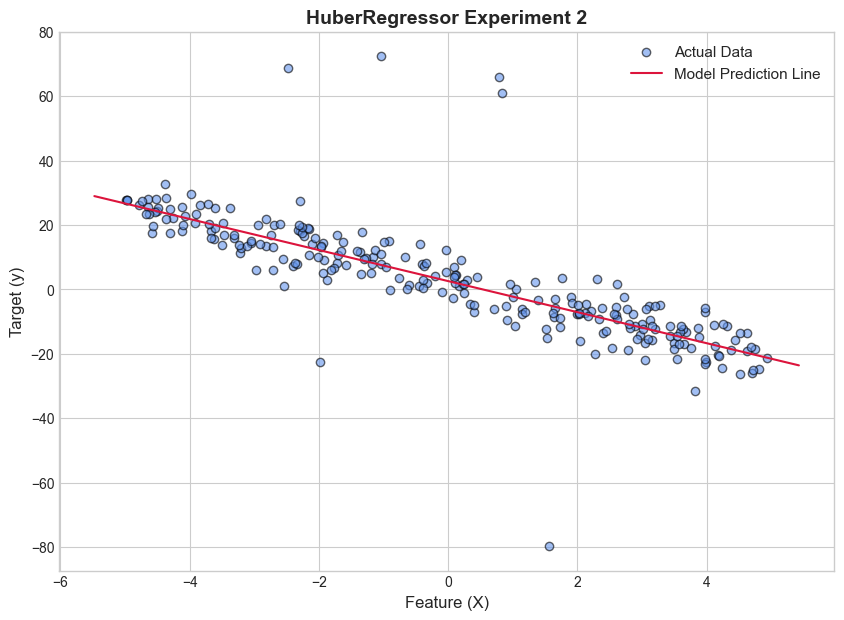


--- Experiment 3: epsilon=1.5, alpha=0.01 ---
----- 📈 Model Evaluation -----
MAE      5.2646
MSE    112.9344
RMSE    10.6271
R2       0.6375
-----------------------------


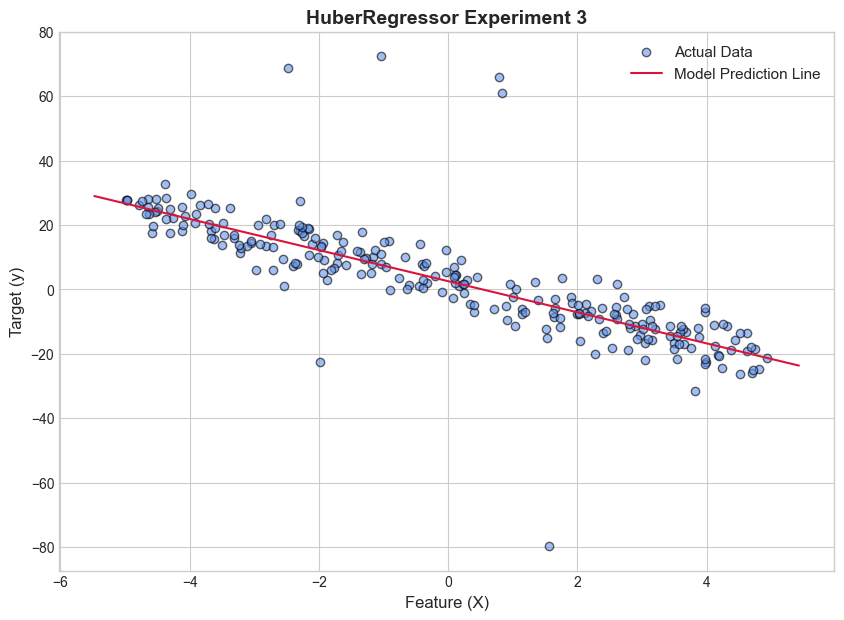

In [1208]:
for i, params in enumerate(hub_params_list, 1):
    hub_model = HuberRegressor(
        epsilon=params['epsilon'],
        alpha=params['alpha'],
        max_iter=100,
        fit_intercept=True,
        tol=1e-5
    )
    hub_model.fit(X_lin, y_lin)
    
    print(f"\n--- Experiment {i}: epsilon={params['epsilon']}, alpha={params['alpha']} ---")
    evaluate_regression_model(y_lin, X_lin, model=hub_model, print_results=True)
    plot_sklearn_regression(hub_model, X_lin, y_lin, title=f"HuberRegressor Experiment {i}")

### 1.3.2. Playing with `PoissonRegressor`

In [1209]:
y_lin_shifted = y_lin - np.min(y_lin) + 1e-3

pois_params_list = [
    {'alpha': 0.0, 'max_iter': 100},
    {'alpha': 0.1, 'max_iter': 200},
    {'alpha': 1.0, 'max_iter': 300},
]


--- Experiment 1: alpha=0.0, max_iter=100 ---
----- 📈 Model Evaluation -----
MAE      5.4245
MSE    114.7743
RMSE    10.7133
R2       0.6316
-----------------------------


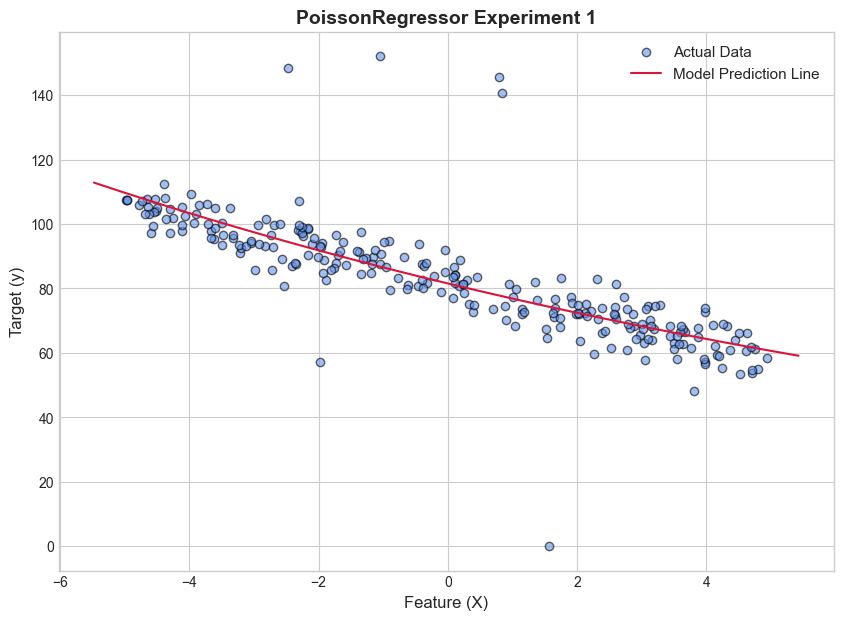


--- Experiment 2: alpha=0.1, max_iter=200 ---
----- 📈 Model Evaluation -----
MAE      5.4243
MSE    114.7734
RMSE    10.7132
R2       0.6316
-----------------------------


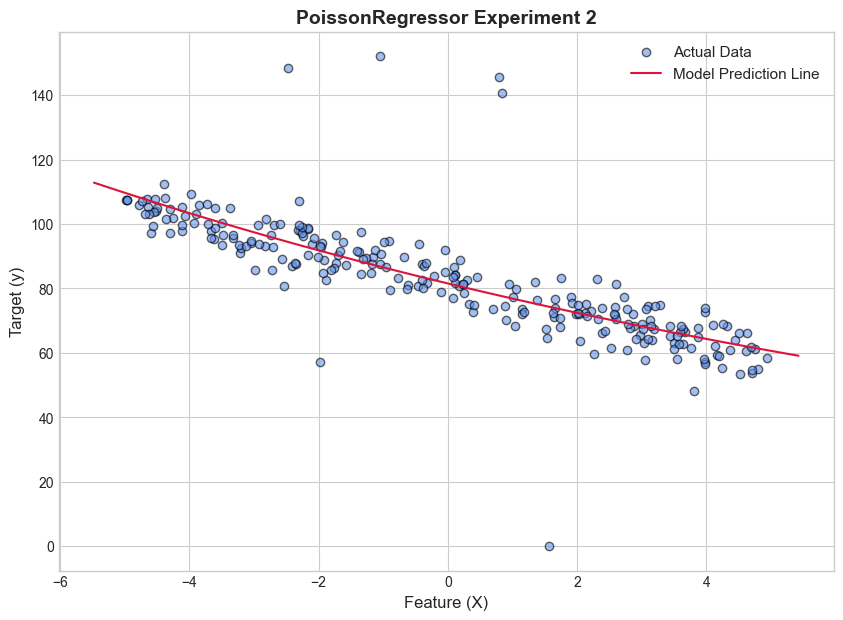


--- Experiment 3: alpha=1.0, max_iter=300 ---
----- 📈 Model Evaluation -----
MAE      5.4228
MSE    114.7654
RMSE    10.7129
R2       0.6316
-----------------------------


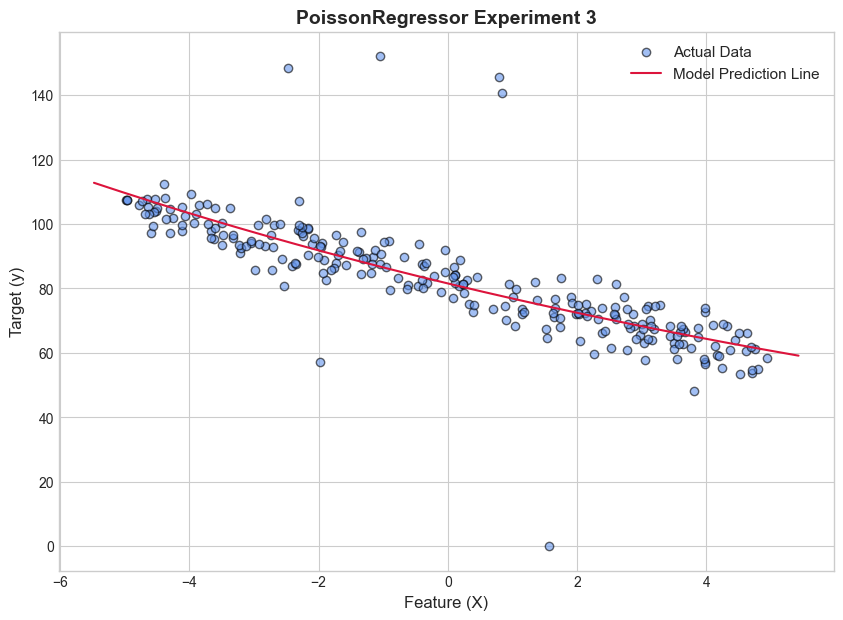

In [1210]:
for i, params in enumerate(pois_params_list, 1):
    pois_model = PoissonRegressor(
        alpha=params['alpha'],
        fit_intercept=True,
        solver='lbfgs',
        max_iter=params['max_iter'],
        tol=1e-4,
        warm_start=True,
        verbose=0
    )
    pois_model.fit(X_lin, y_lin_shifted)
    
    print(f"\n--- Experiment {i}: alpha={params['alpha']}, max_iter={params['max_iter']} ---")
    evaluate_regression_model(y_lin_shifted, X_lin, model=pois_model, print_results=True)
    plot_sklearn_regression(pois_model, X_lin, y_lin_shifted, title=f"PoissonRegressor Experiment {i}")

## 1.4. Configure non-linear models from sklearn library

In [1211]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR

### 1.4.1. Playing with `KNeighborsRegressor`

In [1212]:
knn_params_list = [
    {'n_neighbors': 3, 'weights': 'uniform'},
    {'n_neighbors': 5, 'weights': 'distance'},
    {'n_neighbors': 10, 'weights': 'uniform'}
]


--- Experiment 1: n_neighbors=3, weights=uniform ---
----- 📈 Model Evaluation -----
MAE     5.0416
MSE    79.1732
RMSE    8.8979
R2      0.6763
-----------------------------


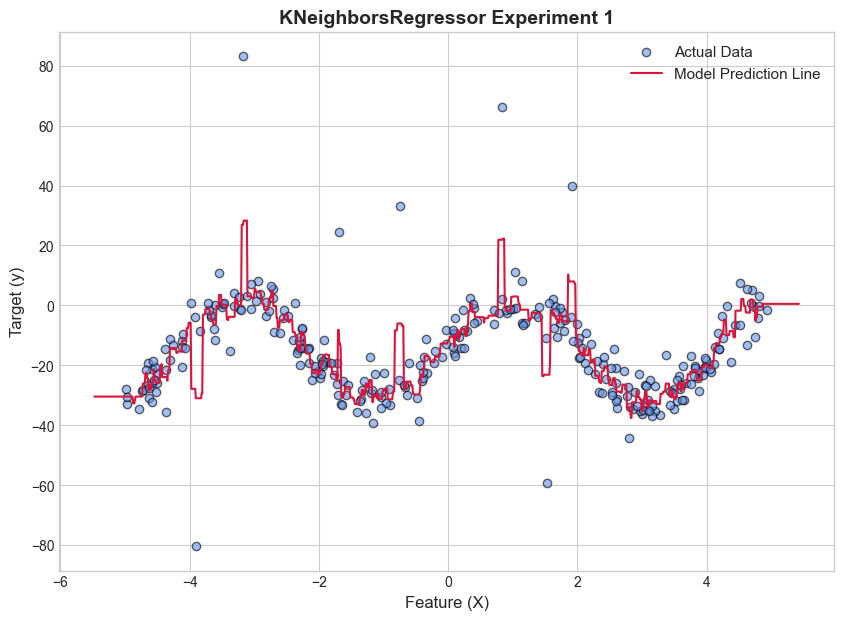


--- Experiment 2: n_neighbors=5, weights=distance ---
----- 📈 Model Evaluation -----
MAE    0.0000
MSE    0.0000
RMSE   0.0000
R2     1.0000
-----------------------------


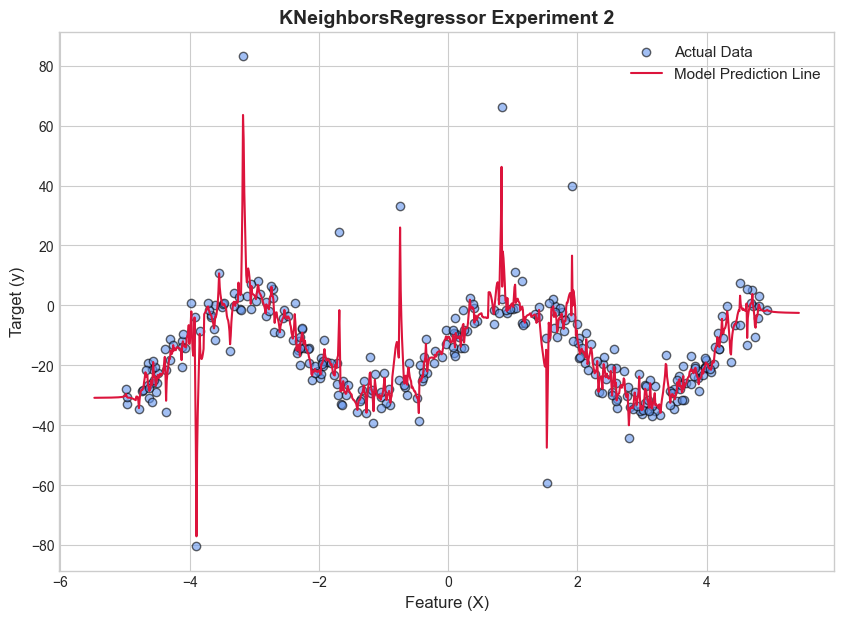


--- Experiment 3: n_neighbors=10, weights=uniform ---
----- 📈 Model Evaluation -----
MAE      5.7676
MSE    108.4340
RMSE    10.4132
R2       0.5566
-----------------------------


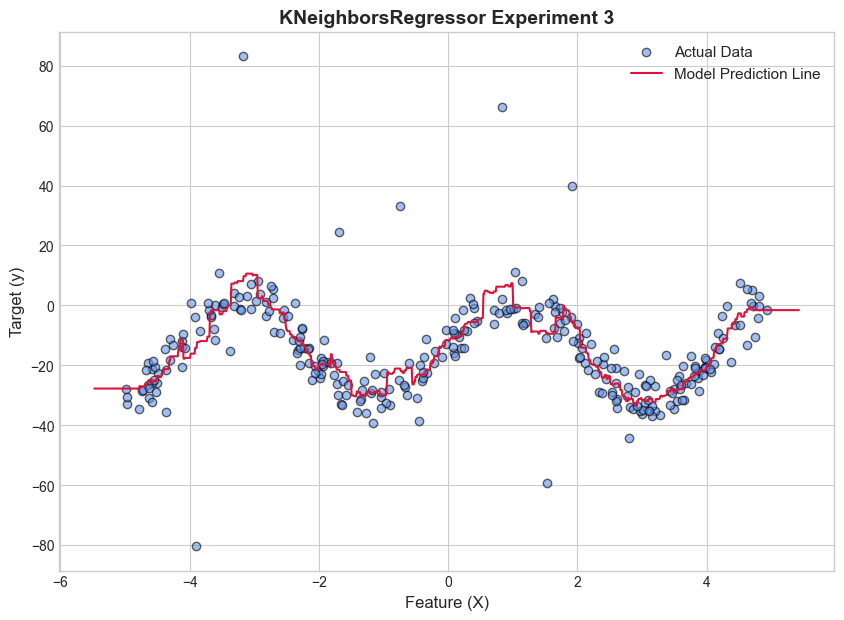

In [1213]:
for i, params in enumerate(knn_params_list, 1):
    knn_model = KNeighborsRegressor(
        n_neighbors=params['n_neighbors'],
        weights=params['weights']
    )
    knn_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: n_neighbors={params['n_neighbors']}, weights={params['weights']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=knn_model, print_results=True)
    plot_sklearn_regression(knn_model, X_nonlin, y_nonlin, title=f"KNeighborsRegressor Experiment {i}")

### 1.4.2. Playing with `RadiusNeighborsRegressor`

In [1214]:
radius_params_list = [
    {'radius': 1.0, 'weights': 'uniform'},
    {'radius': 2.0, 'weights': 'distance'},
    {'radius': 3.0, 'weights': 'uniform'}
]


--- Experiment 1: radius=1.0, weights=uniform ---
----- 📈 Model Evaluation -----
MAE      7.0397
MSE    143.5478
RMSE    11.9811
R2       0.4131
-----------------------------


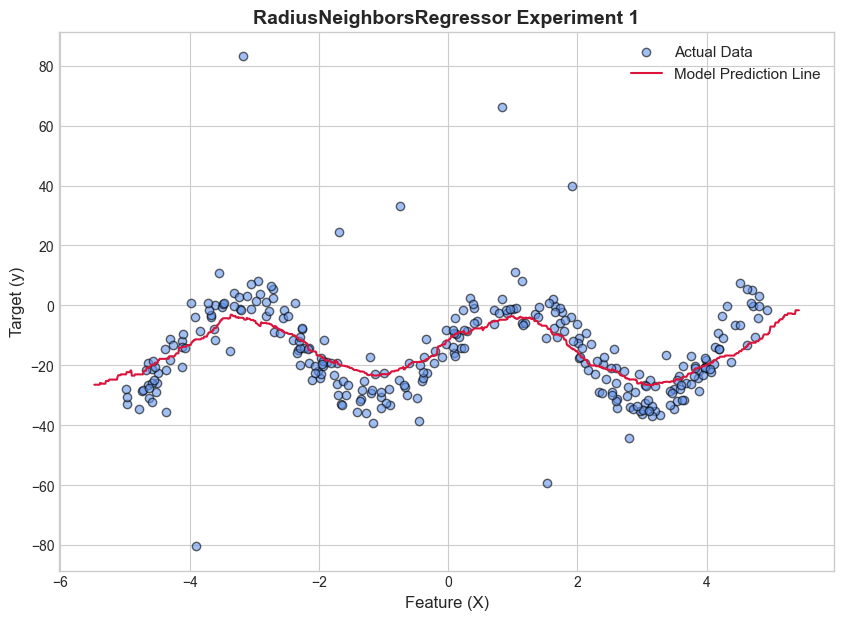


--- Experiment 2: radius=2.0, weights=distance ---
----- 📈 Model Evaluation -----
MAE    0.0000
MSE    0.0000
RMSE   0.0000
R2     1.0000
-----------------------------


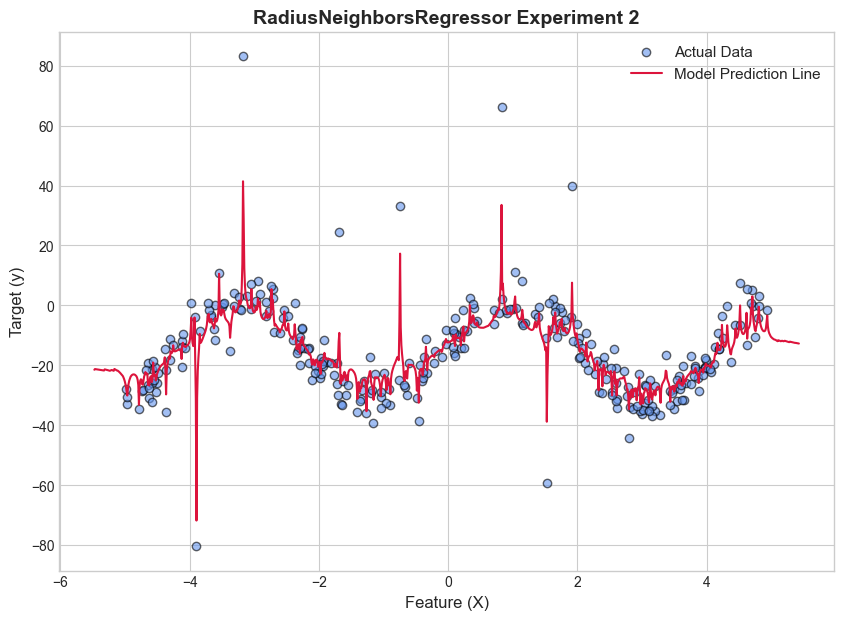


--- Experiment 3: radius=3.0, weights=uniform ---
----- 📈 Model Evaluation -----
MAE     12.8556
MSE    278.9528
RMSE    16.7019
R2      -0.1406
-----------------------------


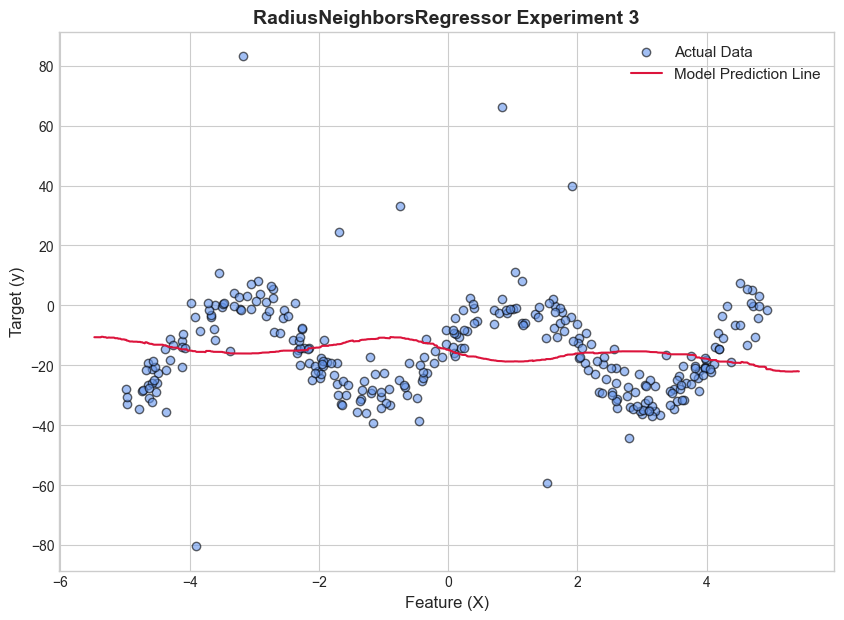

In [1215]:
for i, params in enumerate(radius_params_list, 1):
    radius_model = RadiusNeighborsRegressor(
        radius=params['radius'],
        weights=params['weights']
    )
    radius_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: radius={params['radius']}, weights={params['weights']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=radius_model, print_results=True)
    plot_sklearn_regression(radius_model, X_nonlin, y_nonlin, title=f"RadiusNeighborsRegressor Experiment {i}")

### 1.4.3. Playing with `DecisionTreeRegressor`

In [1216]:
dt_params_list = [
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5}
]


--- Experiment 1: max_depth=None, min_samples_split=2, min_samples_leaf=1 ---
----- 📈 Model Evaluation -----
MAE    0.0000
MSE    0.0000
RMSE   0.0000
R2     1.0000
-----------------------------


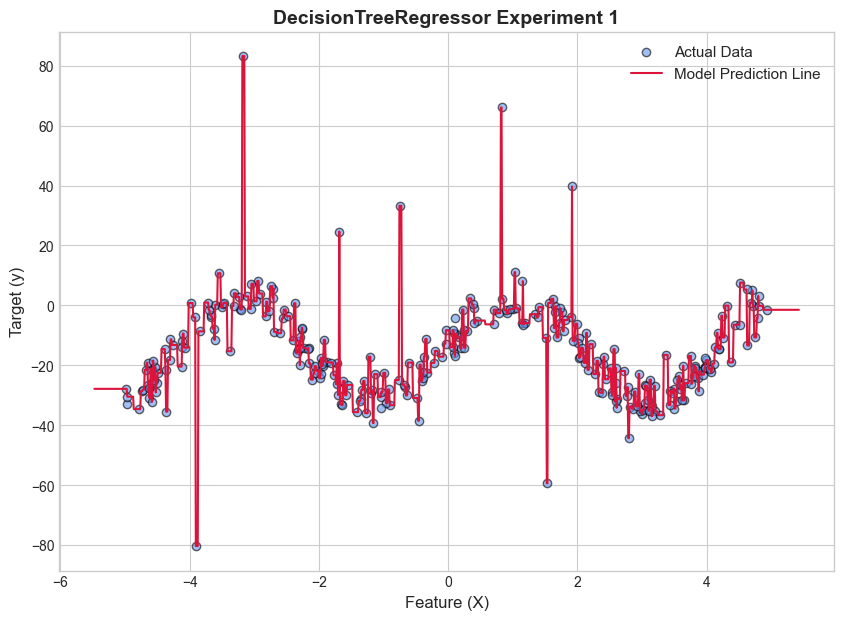


--- Experiment 2: max_depth=5, min_samples_split=2, min_samples_leaf=2 ---
----- 📈 Model Evaluation -----
MAE      5.5027
MSE    105.9097
RMSE    10.2912
R2       0.5670
-----------------------------


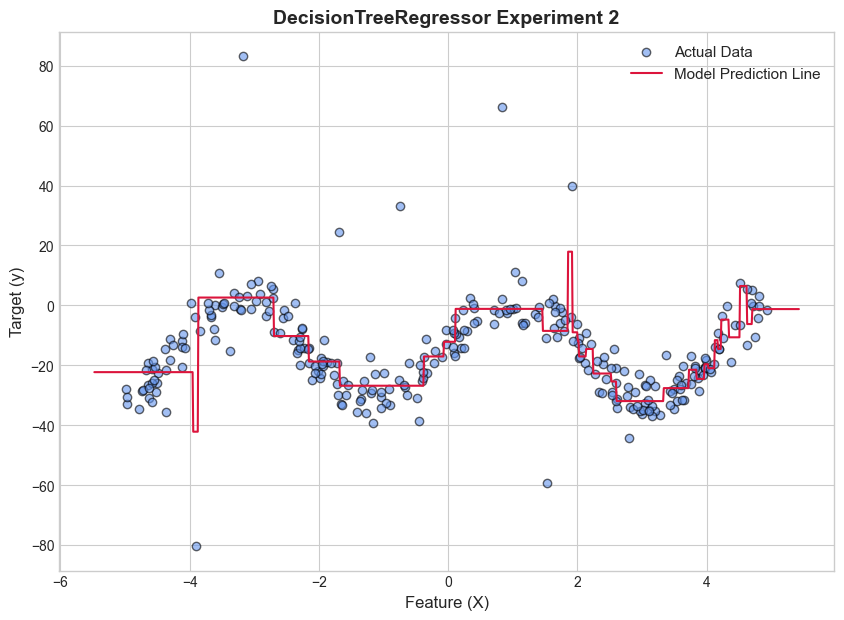


--- Experiment 3: max_depth=10, min_samples_split=5, min_samples_leaf=1 ---
----- 📈 Model Evaluation -----
MAE     2.4393
MSE    18.4947
RMSE    4.3005
R2      0.9244
-----------------------------


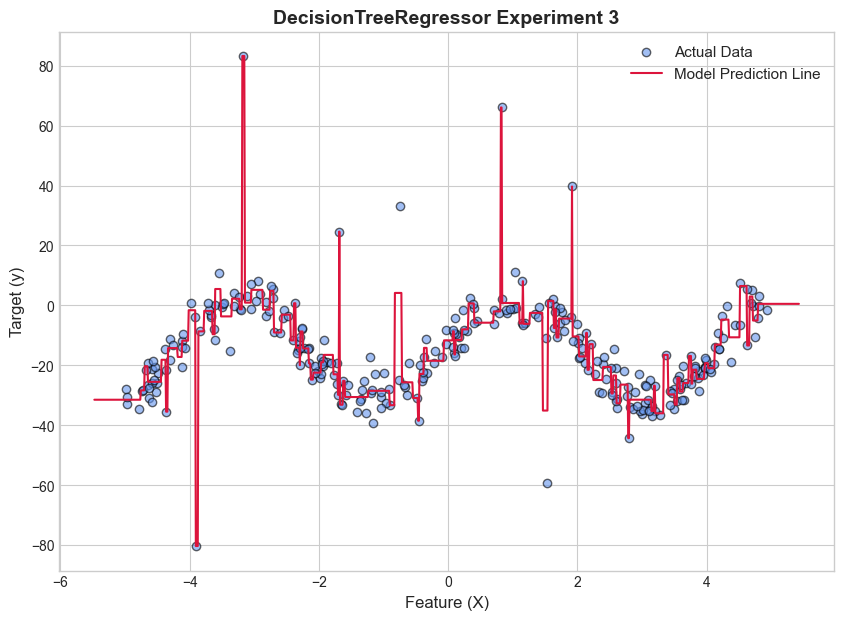


--- Experiment 4: max_depth=15, min_samples_split=10, min_samples_leaf=5 ---
----- 📈 Model Evaluation -----
MAE     5.3314
MSE    91.5202
RMSE    9.5666
R2      0.6258
-----------------------------


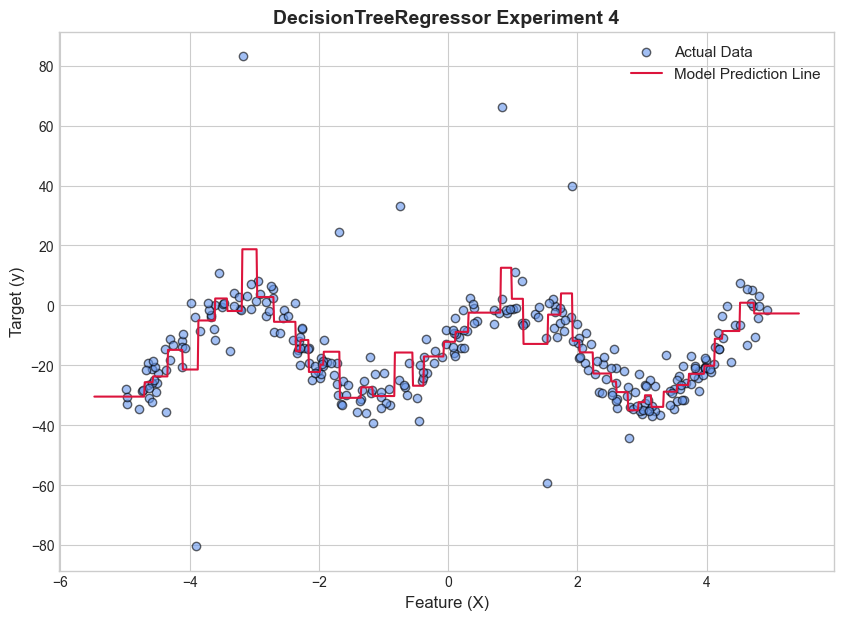

In [1217]:
for i, params in enumerate(dt_params_list, 1):
    dt_model = DecisionTreeRegressor(
        criterion="squared_error",
        splitter="best",
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=STUDENT_NO
    )
    dt_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: max_depth={params['max_depth']}, min_samples_split={params['min_samples_split']}, min_samples_leaf={params['min_samples_leaf']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=dt_model, print_results=True)
    plot_sklearn_regression(dt_model, X_nonlin, y_nonlin, title=f"DecisionTreeRegressor Experiment {i}")

### 1.4.4. Playing with `AdaBoostRegressor`

In [1218]:
adaboost_params_list = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 200, 'learning_rate': 0.1}
]


--- Experiment 1: n_estimators=50, learning_rate=1.0 ---
----- 📈 Model Evaluation -----
MAE      8.7798
MSE    133.2829
RMSE    11.5448
R2       0.4550
-----------------------------


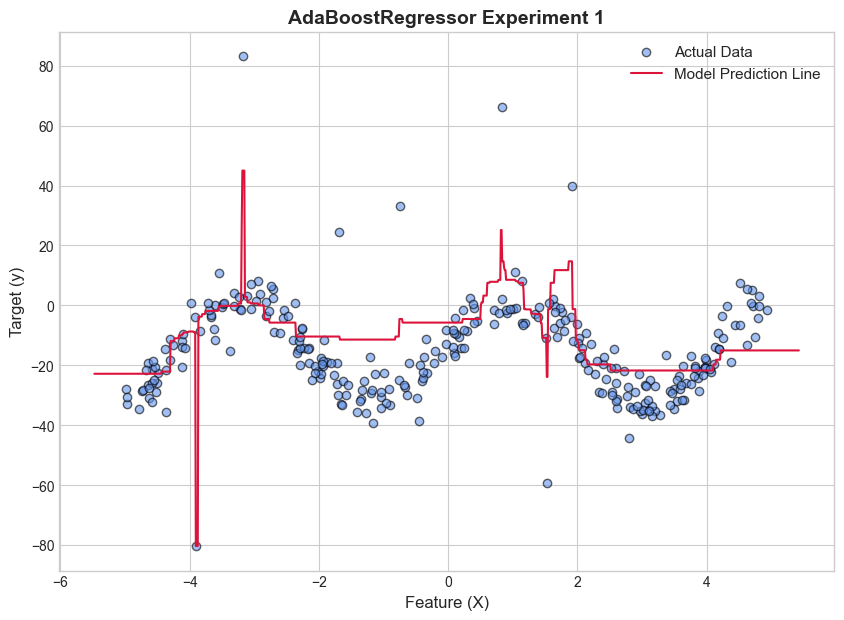


--- Experiment 2: n_estimators=100, learning_rate=0.5 ---
----- 📈 Model Evaluation -----
MAE      8.3608
MSE    132.0575
RMSE    11.4916
R2       0.4601
-----------------------------


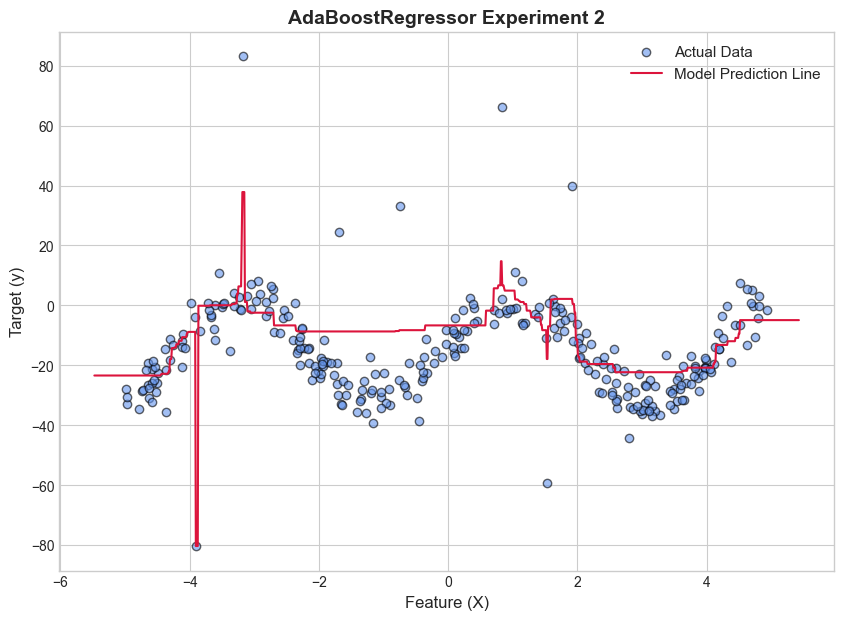


--- Experiment 3: n_estimators=200, learning_rate=0.1 ---
----- 📈 Model Evaluation -----
MAE      8.5652
MSE    144.9788
RMSE    12.0407
R2       0.4072
-----------------------------


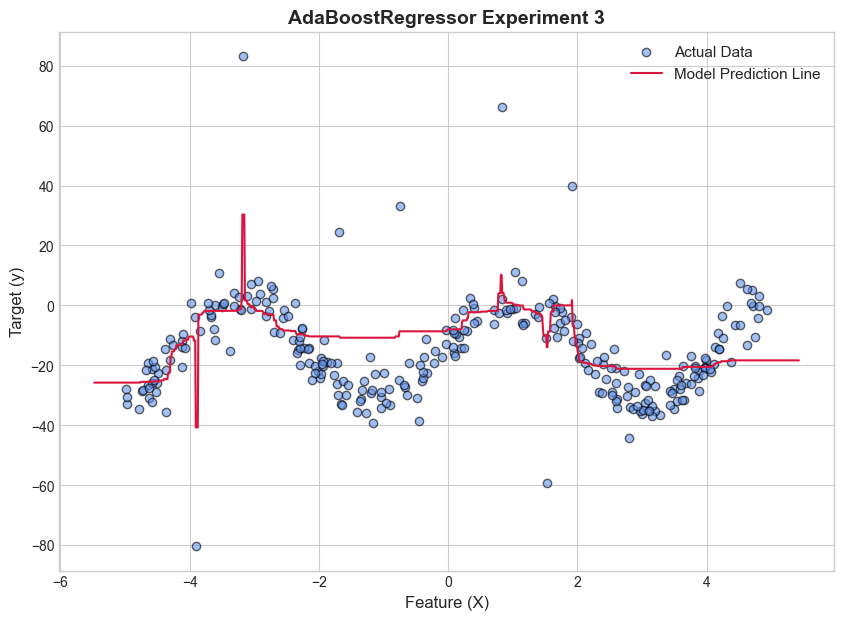

In [1219]:
for i, params in enumerate(adaboost_params_list, 1):
    ada_model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3),
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        random_state=STUDENT_NO
    )
    ada_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: n_estimators={params['n_estimators']}, learning_rate={params['learning_rate']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=ada_model, print_results=True)
    plot_sklearn_regression(ada_model, X_nonlin, y_nonlin, title=f"AdaBoostRegressor Experiment {i}")

### 1.4.5. Playing with `RandomForestRegressor`

In [1220]:
rf_params_list = [
    {'n_estimators': 50, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 200, 'max_depth': 10}
]


--- Experiment 1: n_estimators=50, max_depth=None ---
----- 📈 Model Evaluation -----
MAE     3.0233
MSE    29.8368
RMSE    5.4623
R2      0.8780
-----------------------------


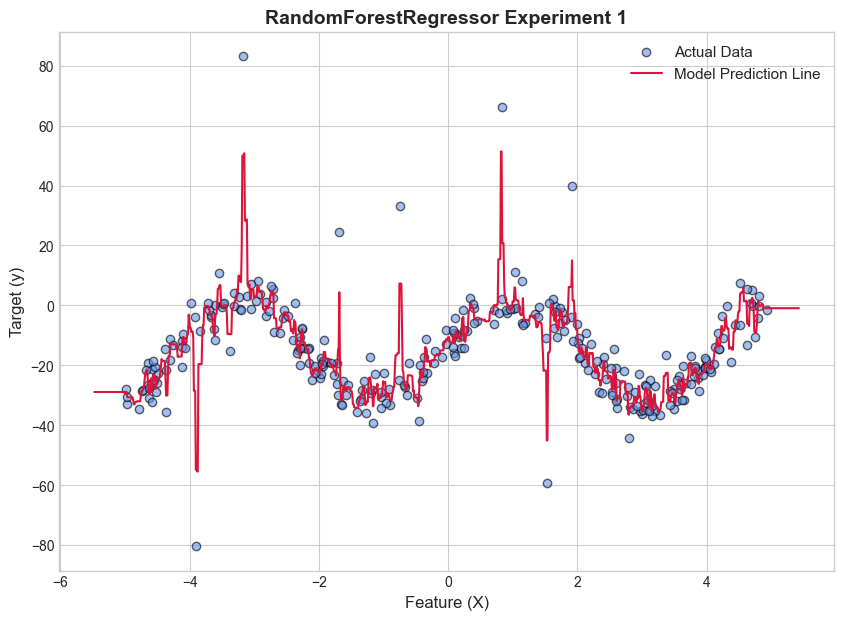


--- Experiment 2: n_estimators=100, max_depth=5 ---
----- 📈 Model Evaluation -----
MAE     4.7837
MSE    78.1804
RMSE    8.8420
R2      0.6803
-----------------------------


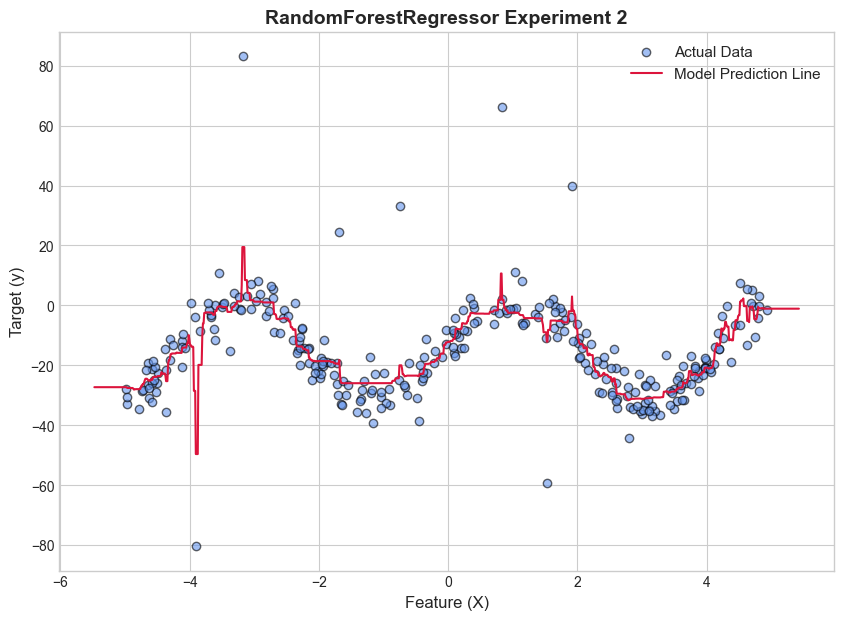


--- Experiment 3: n_estimators=200, max_depth=10 ---
----- 📈 Model Evaluation -----
MAE     3.1101
MSE    27.2184
RMSE    5.2171
R2      0.8887
-----------------------------


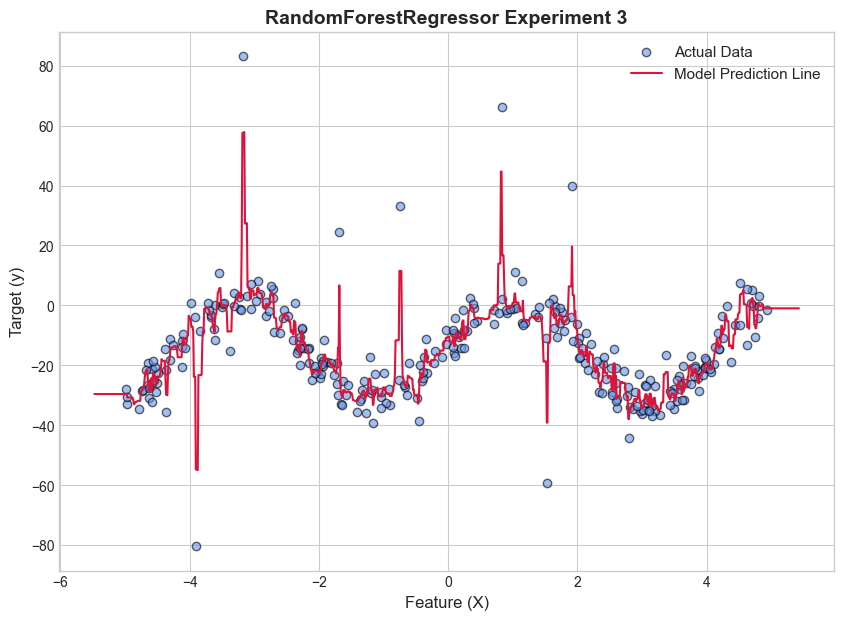

In [1221]:
for i, params in enumerate(rf_params_list, 1):
    rf_model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=STUDENT_NO
    )
    rf_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: n_estimators={params['n_estimators']}, max_depth={params['max_depth']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=rf_model, print_results=True)
    plot_sklearn_regression(rf_model, X_nonlin, y_nonlin, title=f"RandomForestRegressor Experiment {i}")

### 1.4.6. Playing with `GradientBoostingRegressor`

In [1222]:
gb_params_list = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5}
]


--- Experiment 1: n_estimators=100, learning_rate=0.1, max_depth=3 ---
----- 📈 Model Evaluation -----
MAE     3.4048
MSE    23.4355
RMSE    4.8410
R2      0.9042
-----------------------------


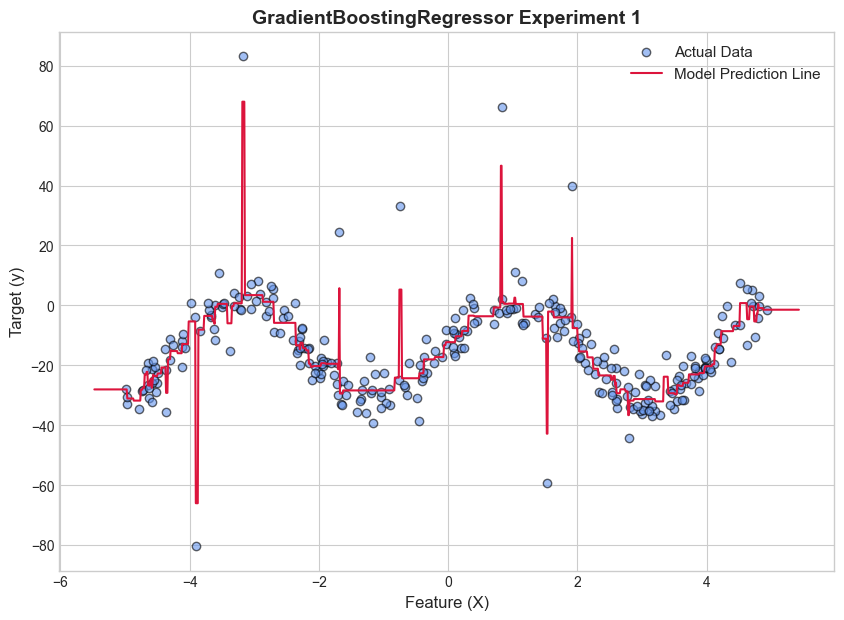


--- Experiment 2: n_estimators=200, learning_rate=0.05, max_depth=4 ---
----- 📈 Model Evaluation -----
MAE     2.8363
MSE    15.5755
RMSE    3.9466
R2      0.9363
-----------------------------


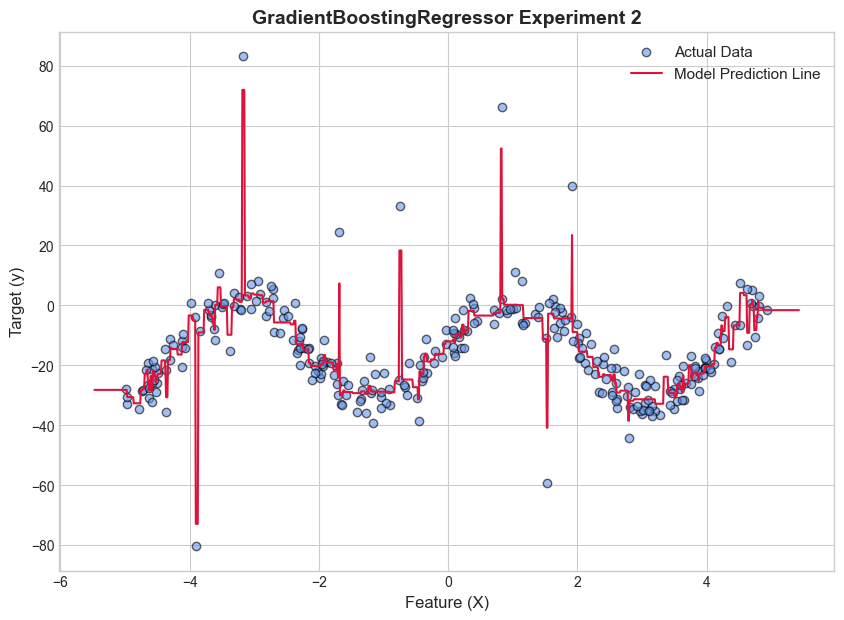


--- Experiment 3: n_estimators=300, learning_rate=0.01, max_depth=5 ---
----- 📈 Model Evaluation -----
MAE     3.4364
MSE    26.6557
RMSE    5.1629
R2      0.8910
-----------------------------


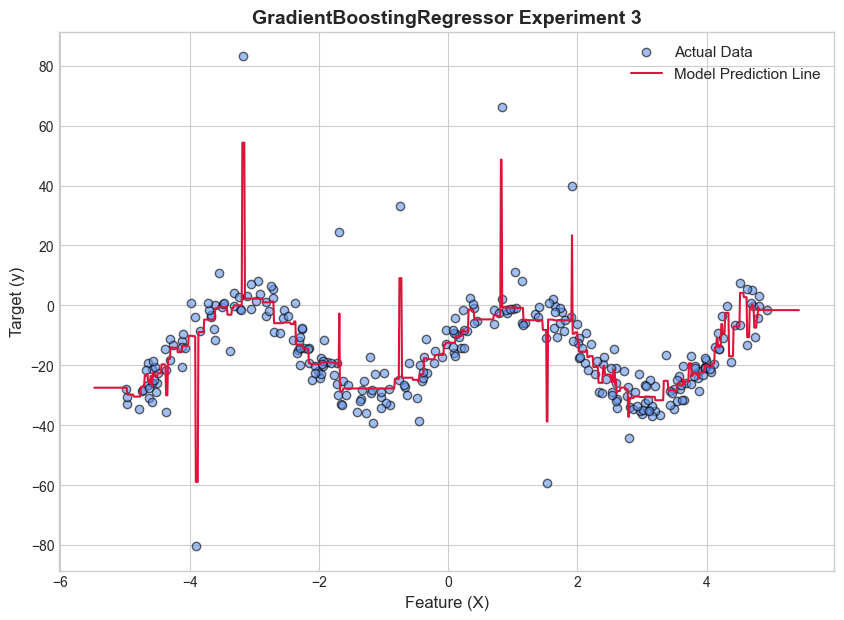

In [1223]:
for i, params in enumerate(gb_params_list, 1):
    gb_model = GradientBoostingRegressor(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        random_state=STUDENT_NO
    )
    gb_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: n_estimators={params['n_estimators']}, learning_rate={params['learning_rate']}, max_depth={params['max_depth']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=gb_model, print_results=True)
    plot_sklearn_regression(gb_model, X_nonlin, y_nonlin, title=f"GradientBoostingRegressor Experiment {i}")

### 1.4.7. Playing with `VotingRegressor`

In [1224]:
voting_params_list = [
    [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(max_depth=3))],
    [('lr', LinearRegression()), ('knn', KNeighborsRegressor(n_neighbors=5))],
    [('dt', DecisionTreeRegressor(max_depth=5)), ('knn', KNeighborsRegressor(n_neighbors=3))]
]


--- Experiment 1: Estimators = ['lr', 'dt'] ---
----- 📈 Model Evaluation -----
MAE      8.8046
MSE    180.7608
RMSE    13.4447
R2       0.2609
-----------------------------


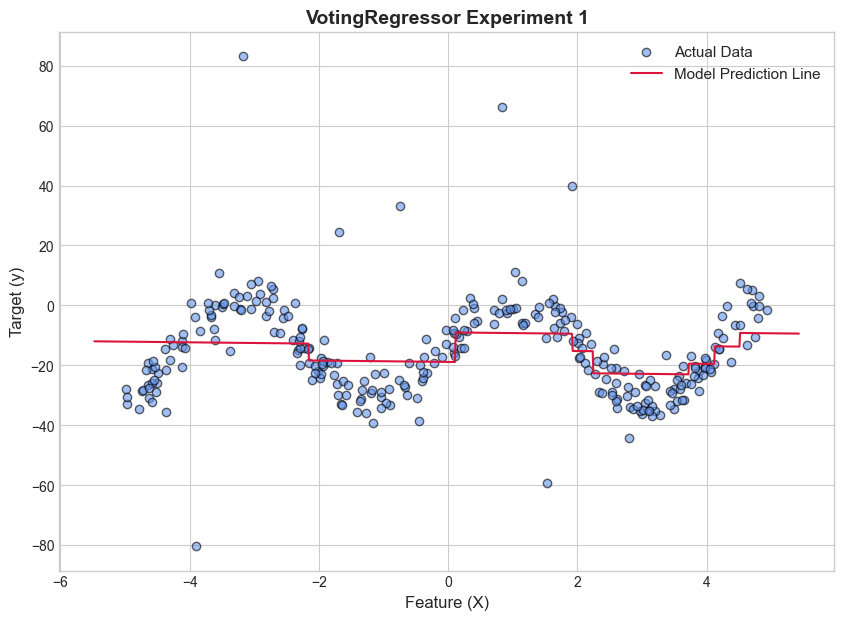


--- Experiment 2: Estimators = ['lr', 'knn'] ---
----- 📈 Model Evaluation -----
MAE      7.3565
MSE    135.0936
RMSE    11.6230
R2       0.4476
-----------------------------


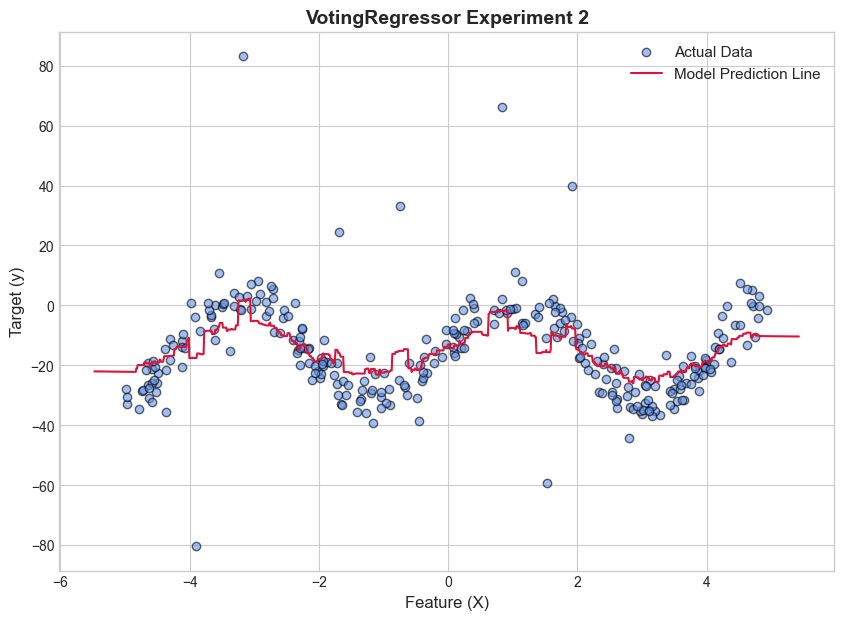


--- Experiment 3: Estimators = ['dt', 'knn'] ---
----- 📈 Model Evaluation -----
MAE     4.7585
MSE    74.6118
RMSE    8.6378
R2      0.6949
-----------------------------


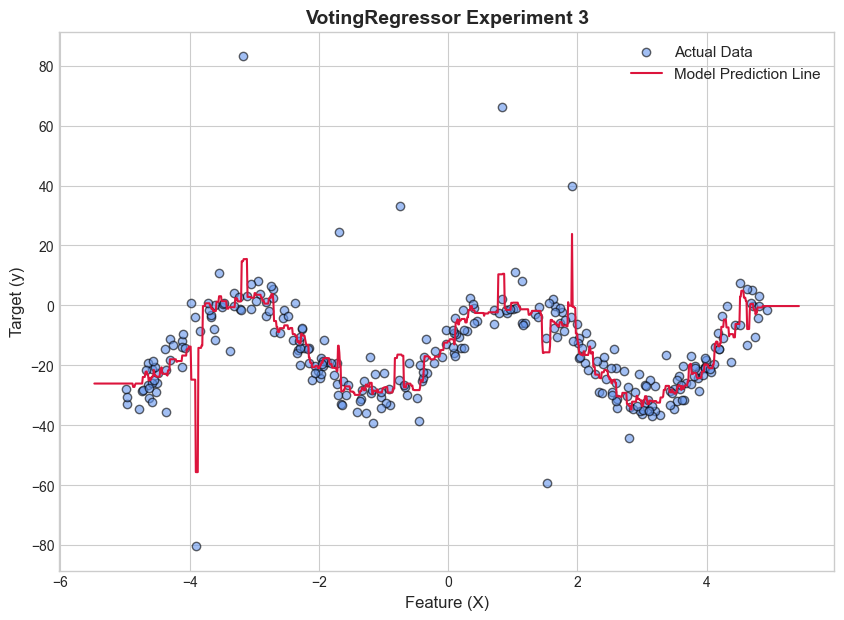

In [1225]:
for i, estimators in enumerate(voting_params_list, 1):
    voting_model = VotingRegressor(estimators=estimators)
    voting_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: Estimators = {[name for name, _ in estimators]} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=voting_model, print_results=True)
    plot_sklearn_regression(voting_model, X_nonlin, y_nonlin, title=f"VotingRegressor Experiment {i}")

### 1.4.8. Playing with `SVR (Support Vector Regression)`

In [1226]:
svr_params_list = [
    {'kernel': 'linear', 'C': 1.0, 'epsilon': 0.1},
    {'kernel': 'rbf', 'C': 10.0, 'epsilon': 0.2},
    {'kernel': 'poly', 'C': 5.0, 'degree': 3, 'epsilon': 0.1}
]


--- Experiment 1: kernel=linear, C=1.0, epsilon=0.1 ---
----- 📈 Model Evaluation -----
MAE     11.5129
MSE    246.3129
RMSE    15.6944
R2      -0.0071
-----------------------------


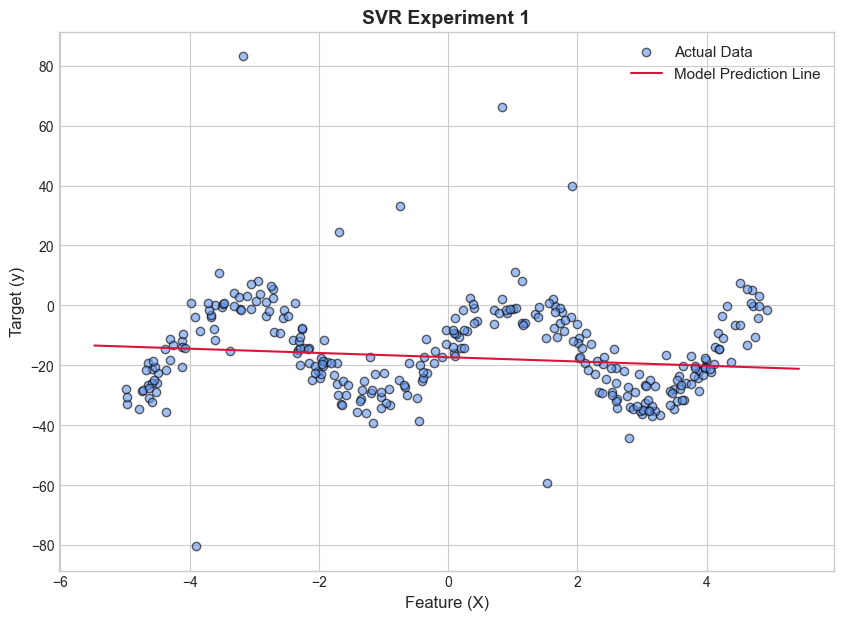


--- Experiment 2: kernel=rbf, C=10.0, epsilon=0.2 ---
----- 📈 Model Evaluation -----
MAE      6.4258
MSE    135.3308
RMSE    11.6332
R2       0.4467
-----------------------------


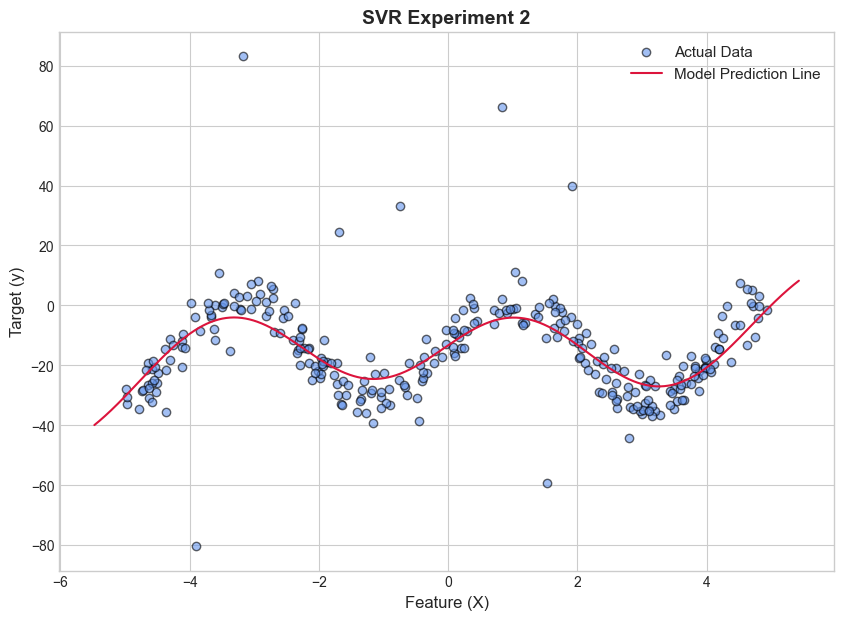


--- Experiment 3: kernel=poly, C=5.0, epsilon=0.1 ---
----- 📈 Model Evaluation -----
MAE     11.6012
MSE    247.7672
RMSE    15.7406
R2      -0.0131
-----------------------------


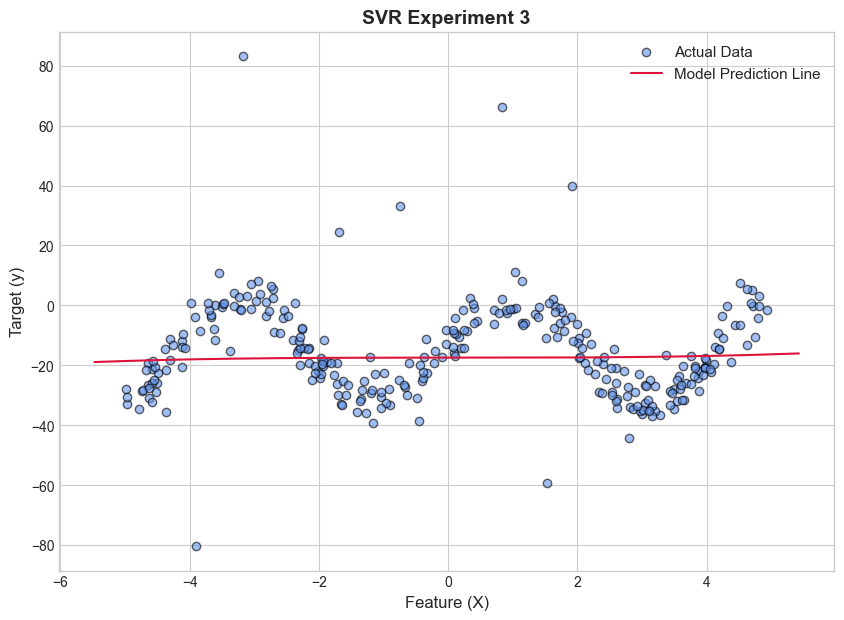

In [1227]:
for i, params in enumerate(svr_params_list, 1):
    svr_model = SVR(
        kernel=params['kernel'],
        C=params['C'],
        epsilon=params['epsilon'],
        degree=params.get('degree', 3)
    )
    svr_model.fit(X_nonlin, y_nonlin)
    
    print(f"\n--- Experiment {i}: kernel={params['kernel']}, C={params['C']}, epsilon={params['epsilon']} ---")
    evaluate_regression_model(y_nonlin, X_nonlin, model=svr_model, print_results=True)
    plot_sklearn_regression(svr_model, X_nonlin, y_nonlin, title=f"SVR Experiment {i}")


# Section 2: experiments on real data

1. Choose any DataSet you like for you experiments (if you've chosen the same, consider that work must differ, otherwise both students will get 0 points for work).
2. Choose the top-3 methods (from `sklearn` library, or you can use other libraries (like `xgboost`) from the previous part.
2. Solve the regression problem in the same manner, as you used for.
    1. Load the data
    2. Do data visualization: correlation, feature distribution, etc.
    3. Do data analysis
    4. Do data correction
    5. Prepare data on usage with ML model: train, validation if necessary, test split; data convertion (to fix distribution or change data type to numeric); remove outliers.
    6. Tune hyperparameters of your model to get the best one.
    7. Train & test the final version of the model. Do conclusion.
3. Your main goal is tune hyperparameters of the chosen models.
4. Examples and template you can find in `ML_basic_course/lab_works/lab2/lab_2_example_plus_task.ipynb`. Or in [my GitHub repo's folder](https://github.com/VolDonets/ML_basics_course/tree/master/lab_works/lab_2)
5. Use that notebook as template, but remember your main goal is to tune hyperparameters of chosen models.

### 2.1. Load the Data

In [1228]:
df = pd.read_csv("./Restaurant_revenue.csv")
df = df.dropna(subset=["Monthly_Revenue"])

X = df.drop(columns=["Monthly_Revenue"])
y = df["Monthly_Revenue"]

categorical_features = ["Cuisine_Type"]
numeric_features = [c for c in X.columns if c not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 2.2 Data Visualization

####  RandomForest

----- 📈 Model Evaluation -----
MAE      51.8389
MSE    4089.0261
RMSE     63.9455
R2        0.6257
-----------------------------


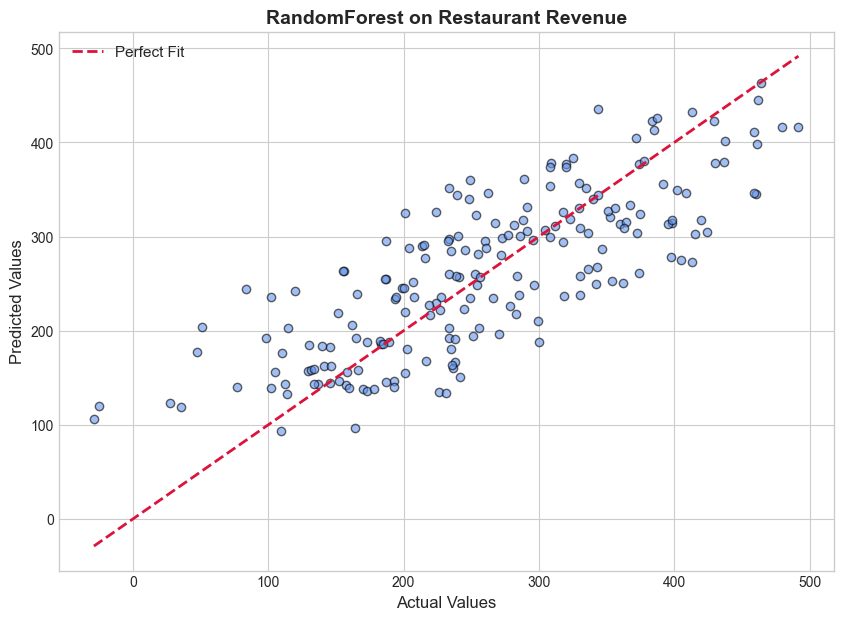

In [1229]:
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=300, random_state=12, n_jobs=-1))
])
rf_model.fit(X_train, y_train)

evaluate_regression_model(y_test, X_test, rf_model)
plot_sklearn_regression(rf_model, X_test, y_test, title="RandomForest on Restaurant Revenue")

#### GradientBoosting

----- 📈 Model Evaluation -----
MAE      53.3611
MSE    4274.9190
RMSE     65.3829
R2        0.6087
-----------------------------


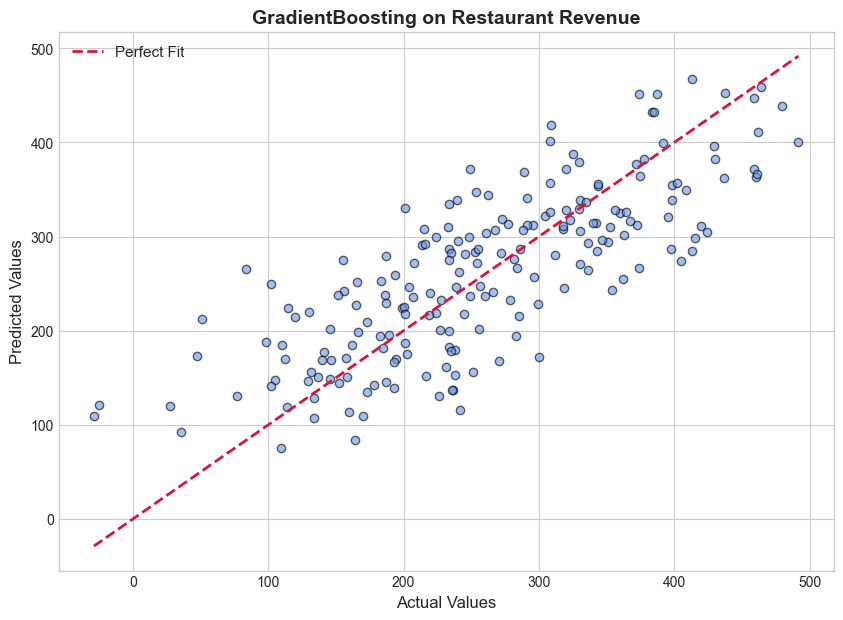

In [1230]:
gbr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42))
])
gbr_model.fit(X_train, y_train)

evaluate_regression_model(y_test, X_test, gbr_model)
plot_sklearn_regression(gbr_model, X_test, y_test, title="GradientBoosting on Restaurant Revenue")

#### SVR

----- 📈 Model Evaluation -----
MAE      51.3769
MSE    4005.0954
RMSE     63.2858
R2        0.6334
-----------------------------


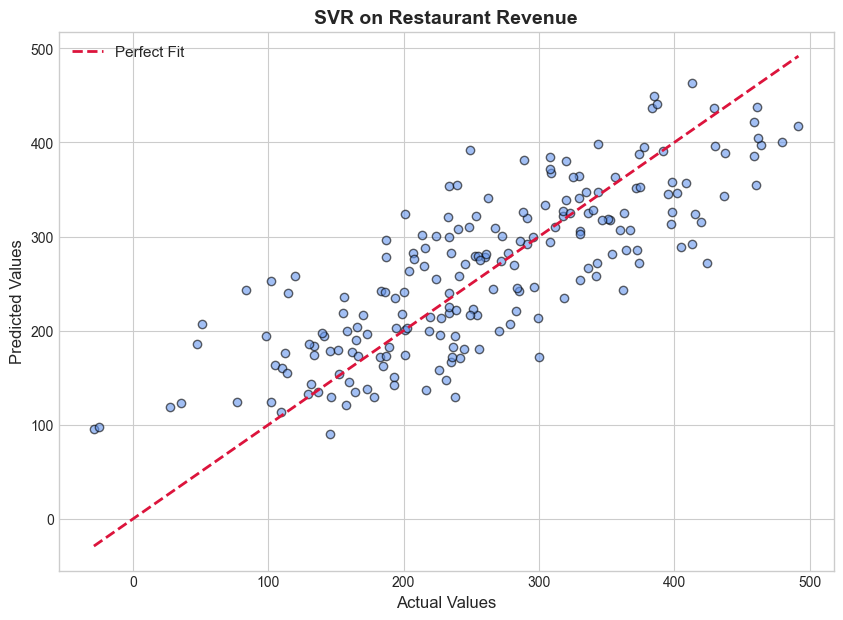

In [1231]:
svr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.2))
])
svr_model.fit(X_train, y_train)

evaluate_regression_model(y_test, X_test, svr_model)
plot_sklearn_regression(svr_model, X_test, y_test, title="SVR on Restaurant Revenue")

### Compare Results

In [1232]:
models = {
    "RandomForest": rf_model,
    "GradientBoosting": gbr_model,
    "SVR": svr_model
}

results = {}
for name, model in models.items():
    results[name] = evaluate_regression_model(y_test, X_test, model, print_results=False)

results_df = pd.DataFrame(results).T
print("Model Comparison on Restaurant Revenue")
results_df


Model Comparison on Restaurant Revenue


,MAE,MSE,RMSE,R2
RandomForest,51.838944,4089.026116,63.945493,0.625674
GradientBoosting,53.361076,4274.918995,65.382865,0.608656
SVR,51.376934,4005.095358,63.285823,0.633357


Результати оцінки моделей показали:

RandomForest: MAE ≈ 51.84, RMSE ≈ 63.95, R² ≈ 0.63

GradientBoosting: MAE ≈ 53.36, RMSE ≈ 65.38, R² ≈ 0.61

SVR: MAE ≈ 51.38, RMSE ≈ 63.29, R² ≈ 0.63

Аналіз метрик свідчить, що всі моделі здатні пояснити приблизно 61–63% варіації виручки ресторанів. Найкращі показники R² і RMSE демонструє SVR, що свідчить про його трохи кращу здатність до прогнозування у порівнянні з RandomForest та GradientBoosting.

В цілому, моделі показали достатньо точні результати для практичного використання у прогнозуванні виручки ресторанного бізнесу, але для підвищення точності можна застосувати тонке налаштування гіперпараметрів та розширення набору ознак.